In [30]:
import numpy as np
import cv2
import pandas as pd

In [31]:
img=cv2.imread("C:/Users/ashut/Desktop/Course Project_2/svm/dataset/semantic_drone_dataset/original_images/594.jpg",cv2.IMREAD_GRAYSCALE)

In [32]:
# img.shape

img2=cv2.resize(img,(400,600))

In [33]:
df=pd.DataFrame()  # empty data frame



In [34]:
# First feature is the pixel location
# adding the original pixel values to the data frame
img_flat=img2.reshape(-1)
df['Original Image']=img_flat

In [35]:
print(df)

        Original Image
0                  158
1                  102
2                   43
3                   85
4                   91
...                ...
239995              96
239996              97
239997              98
239998              83
239999              93

[240000 rows x 1 columns]


In [36]:
# New features
# Generate Gabor features
num=1 # To count numbers up in order to give gabor features a label in the df
kernels=[]
for theta in range(2):
    theta =theta/4 * np.pi
    for sigma in (1,3):
        for lambda_ in np.arange(0,np.pi,np.pi/4): # Range of wavelengths
            for gamma in (0.05,0.5):
                gabor_label="Gabor" + str(num)  # label Gabor features as Gabor 1
                # print(gabor_label)
                ksize=5
                kernel=cv2.getGaborKernel((ksize,ksize),sigma,theta,lambda_, gamma,psi=0,ktype=cv2.CV_32F)
                kernels.append(kernel)
                #Now filter the images and add values to a new column
                fimg=cv2.filter2D(img_flat,cv2.CV_8UC3,kernel)
                filtered_img=fimg.reshape(-1)
                df[gabor_label]=filtered_img
                # Labels column as Gabor 1 Gabor 2 etc.
                num+=1 # Increment for gabor column lab

# 32 filters are applied here


In [37]:
print(df)

        Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  \
0                  158       0       0     252     220      75      65   
1                  102       0       0     255     222      82      66   
2                   43       0       0     255     203      80      60   
3                   85       0       0     255     204      80      61   
4                   91       0       0     255     244      91      73   
...                ...     ...     ...     ...     ...     ...     ...   
239995              96       0       0     255     218      81      65   
239996              97       0       0     255     214      79      64   
239997              98       0       0     255     210      78      62   
239998              83       0       0     255     204      76      60   
239999              93       0       0     255     202      76      60   

        Gabor7  Gabor8  Gabor9  ...  Gabor23  Gabor24  Gabor25  Gabor26  \
0           35      31       0  ... 

In [38]:
# Adding more features

#Canny edge
edges=cv2.Canny(img2,100,200)
edges_f=edges.reshape(-1)
df['Canny Edge']=edges_f

from skimage.filters import roberts,sobel,scharr,prewitt

edge_roberts=roberts(img2)
edge_roberts_f=edge_roberts.reshape(-1)
df['Roberts']=edge_roberts_f

edge_sobel=sobel(img2)
edge_sobel_f=edge_sobel.reshape(-1)
df['Sobel']=edge_sobel_f

edge_scharr=scharr(img2)
edge_scharr_f=edge_scharr.reshape(-1)
df['Scharr']=edge_scharr_f

edge_prewitt=prewitt(img2)
edge_prewitt_f=edge_prewitt.reshape(-1)
df['Prewitt']=edge_prewitt_f





In [39]:
# Gaussian with sigma=3
from scipy import ndimage as nd 
gaussian_img=nd.gaussian_filter(img2,sigma=3)
gaussian_img_f =gaussian_img.reshape(-1)
df['Gaussian s3']=gaussian_img_f

In [40]:
#Gaussian with sigma=7
gaussian_img2=nd.gaussian_filter(img2,sigma=7)
gaussian_img3=gaussian_img2.reshape(-1)
df['Gaussian s7']=gaussian_img3

In [41]:
#MEDIAN with sigma=3
median_img=nd.median_filter(img2,size=3)
median_img1=median_img.reshape(-1)
df['Median s3']=median_img1


In [42]:
# variance_img=nd.generic_filter(img,np.var,size=3)
# variance_img1=variance_img.reshape(-1)
# df['Variance s3']=variance_img1

# As gabor includes variance

In [43]:
print(df.head())

   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             158       0       0     252     220      75      65      35   
1             102       0       0     255     222      82      66      38   
2              43       0       0     255     203      80      60      38   
3              85       0       0     255     204      80      61      38   
4              91       0       0     255     244      91      73      43   

   Gabor8  Gabor9  ...  Gabor31  Gabor32  Canny Edge   Roberts     Sobel  \
0      31       0  ...        0        0           0  0.085603  0.109808   
1      31       0  ...      104       93         255  0.316228  0.297474   
2      28       0  ...      212      194           0  0.253859  0.084984   
3      28       0  ...      161      145         255  0.111782  0.122898   
4      34       0  ...      146      132         255  0.259772  0.128401   

     Scharr   Prewitt  Gaussian s3  Gaussian s7  Median s3  
0  0.125182  0.0904

In [44]:
# Add label column
labeled_image=cv2.imread(r"C:\Users\ashut\Desktop\Course Project_2\Random_Forest\RGB_color_image_masks\594.png",cv2.IMREAD_GRAYSCALE)

labeled_image=cv2.resize(labeled_image,(400,600))
labeled_img1=labeled_image.reshape(-1)
df['Label']=labeled_img1

In [45]:
print(df.head())

   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             158       0       0     252     220      75      65      35   
1             102       0       0     255     222      82      66      38   
2              43       0       0     255     203      80      60      38   
3              85       0       0     255     204      80      61      38   
4              91       0       0     255     244      91      73      43   

   Gabor8  Gabor9  ...  Gabor32  Canny Edge   Roberts     Sobel    Scharr  \
0      31       0  ...        0           0  0.085603  0.109808  0.125182   
1      31       0  ...       93         255  0.316228  0.297474  0.306947   
2      28       0  ...      194           0  0.253859  0.084984  0.075191   
3      28       0  ...      145         255  0.111782  0.122898  0.135385   
4      34       0  ...      132         255  0.259772  0.128401  0.148750   

    Prewitt  Gaussian s3  Gaussian s7  Median s3  Label  
0  0.090461     

In [46]:
Y=df['Label'].values

In [47]:
df


,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor32,Canny Edge,Roberts,Sobel,Scharr,Prewitt,Gaussian s3,Gaussian s7,Median s3,Label
0,158,0,0,252,220,75,65,35,31,0,...,0,0,0.085603,0.109808,0.125182,0.090461,120,109,145,0
1,102,0,0,255,222,82,66,38,31,0,...,93,255,0.316228,0.297474,0.306947,0.286406,119,108,102,119
2,43,0,0,255,203,80,60,38,28,0,...,194,0,0.253859,0.084984,0.075191,0.098851,117,107,85,119
3,85,0,0,255,204,80,61,38,28,0,...,145,255,0.111782,0.122898,0.135385,0.108729,114,105,85,119
4,91,0,0,255,244,91,73,43,34,0,...,132,255,0.259772,0.128401,0.148750,0.103565,111,103,91,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,96,0,0,255,218,81,65,38,30,0,...,101,0,0.003922,0.022549,0.019877,0.026176,98,100,98,0
239996,97,0,0,255,214,79,64,37,30,0,...,94,0,0.003922,0.010559,0.012294,0.008267,98,101,98,0
239997,98,0,0,255,210,78,62,37,29,0,...,93,0,0.058824,0.035687,0.035846,0.036155,98,101,98,0
239998,83,0,0,255,204,76,60,36,28,0,...,104,0,0.039216,0.033976,0.036096,0.031644,97,101,98,0


In [48]:
X=df.drop(labels=['Label'],axis=1)

In [49]:
X.shape

(240000, 41)

In [50]:
# Split the data into test and train data
from sklearn.model_selection import train_test_split
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.4,random_state=1)


In [51]:
print(X_train.shape)


(144000, 41)


In [52]:
# Import ML algorithm and train the model
from sklearn.svm import LinearSVC
model=LinearSVC(max_iter=100)

model.fit(X_train,Y_train)

c:\Users\ashut\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100)

In [53]:
prediction=model.predict(X_test)

In [54]:
from sklearn import metrics
print("Accuracy=",metrics.accuracy_score(Y_test,prediction))

Accuracy= 0.33067708333333334


In [55]:

# importances=list(model.feature_importances_)
# features_list=list(X.columns)
# feature_imp=pd.Series(model.feature_importances_,index=features_list).sort_values(ascending=False)
# print(feature_imp)

In [56]:
# Store this model and use for future
import pickle
filename='Drone Model'
pickle.dump(model,open(filename,'wb'))


In [57]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.predict(X)

In [61]:
segmented=result.reshape((img2.shape))



In [62]:
segmented.shape

(600, 400)

Text(0.5, 1.0, 'Ground truth segmentation')

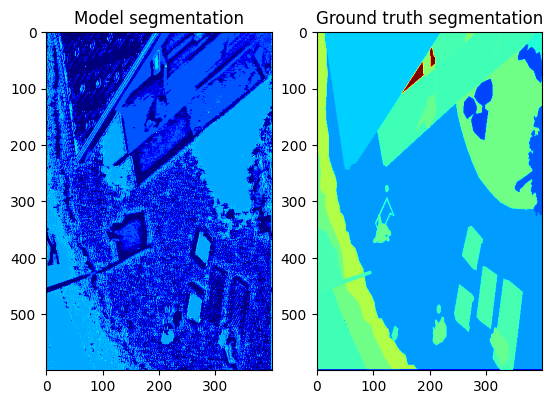

In [64]:
from matplotlib import pyplot as plt
plt.subplot(121)
plt.imshow(segmented,cmap='jet')
plt.imsave('segmented_drone1.jpg',segmented,cmap='jet')
plt.title("Model segmentation")
plt.subplot(122)
plt.imshow(labeled_image,cmap='jet')
plt.title("Ground truth segmentation")